# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Pendahuluan](#intro)
* [Tahap 2. Import Library](#library_import)
* [Tahap 3. Pra Pemrosesan Data](#observation)
    * [3.1 Mengubah Nama Tabel]
    * [3.2 Mencari Nilai Yang Hilang, Tipe Data, dan Duplikat]
    * [3.3 Menambahkan Kolom Waktu Dan Tanggal]
* [Tahap 4. Analisa Data](#observation)
    * [4.1 Banyak Peristiwa Dalam Log]
    * [4.2 Banyak Pengguna Dalam Log]
    * [4.3 Rata-Rata Peristiwa Per Pengguna]
    * [4.4 Periode Yang Tercakup Data]
    * [4.5 Banyak Data Yang HIlang Saat Menyingkirkan Data Lama]
    * [4.6 Memisahkan Nama Alamat]
* [Tahap 5. Analisa Data](#observation)
    * [5.1 Peristiwa Yang Ada Dalam Log dan Banyak Frekuensi Kemunculannya]
    * [5.2 Jumlah Pengguna Yang Melakukan Setiap Tindakan]
    * [5.3 Urutan Peristiwa Yang Terjadi
    * [5.4 Persentase Pengguna Yang Terus Berlanjut Dari Satu Tahap Ke Tahap Berikutnya]
    * [5.5 Tahap Paling Banyak Kehilangan Pengguna]
    * [5.6 Persentase Pengguna Yang Berhasil Menyelesaikan Seluruh Tahapan Yang Ada]
* [Tahap 6. Pelajari Hasil Eksperimen]
    * [6.1 Pengguna Yang Ada Di Setiap Kelompok]
    * [6.2 Melihat Perbedaan Antara Sampel 246 dan 247 Dari Sisi Statistik]
    * [6.3 Membandingkan Satu Kelompok Dengan Kelompok Lainnya]
    * [6.4 Yang Merupakan Ciri-Ciri Dari Jenis Usaha Berbasis Waralaba]
* [Kesimpulan](#end)

## Pendahuluan

Anda bekerja di sebuah startup yang menjual produk makanan. Anda perlu mencari tahu perilaku pengguna aplikasi dari perusahaan tersebut. Perilaku dari pengguna akan dilihat dengan melakukan percobaan A/A testing dan A/B testing pada pengubahan Fot dari tulisan yang sama. Tujuannya adalah untuk mengetahui metode apa yang paling banyak diminati oleh pelanggan.

## Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotly import graph_objects as go
import plotly.express as px
from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')

## Pra Pemrosesan Data

In [4]:
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [5]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [6]:
df.shape

(244126, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


### Mengubah Nama Tabel

In [8]:
df.rename(columns={
    'EventName': 'event',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'timestamp',
    'ExpId': 'exp_id'
}, inplace=True)

In [9]:
df.columns

Index(['event', 'user_id', 'timestamp', 'exp_id'], dtype='object')

### Mencari Nilai Yang Hilang, Tipe Data, dan Duplikat

In [10]:
df.isna().sum()

event        0
user_id      0
timestamp    0
exp_id       0
dtype: int64

In [11]:
df.dtypes

event        object
user_id       int64
timestamp     int64
exp_id        int64
dtype: object

In [12]:
df.duplicated().sum()

413

In [13]:
df = df.drop_duplicates().reset_index(drop=True)

### Menambahkan Kolom Waktu Dan Tanggal

In [14]:
df['date_time'] = pd.to_datetime(df['timestamp'], unit='s')

In [15]:
df.head()

,event,user_id,timestamp,exp_id,date_time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


In [16]:
df['date'] = df['date_time'].dt.floor('1D')

In [17]:
df.head()

,event,user_id,timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


Pada tahap 3, dilakukan pengubahan nama kolom tabel agar lebih mudah dalam mengakses kolom-kolom yanga da pada tabel tersebut. Selain itu terdapat nilai duplikat sebanyak 413 yang mana telah dihapus dari datase. Dalam dataset tidak terdapat nilai null.

## Mempelajari dan Memeriksa Data

### Banyak Peristiwa Dalam Log

In [18]:
events = len(df)
print(f'{events} events')

243713 events


### Banyak Pengguna Dalam Log

In [19]:
users = len(df['user_id'].unique())
print(f'{users} users')

7551 users


### Rata-Rata Peristiwa Per Pengguna

In [20]:
event_user = events / users
print(f'{round(event_user, 0)} event per user')

32.0 event per user


In [21]:
user_group_date = df.groupby('date')['user_id'].count()
user_group_date

date
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      412
2019-07-31     2030
2019-08-01    36141
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-05    36058
2019-08-06    35788
2019-08-07    31096
Name: user_id, dtype: int64

<AxesSubplot:xlabel='date'>

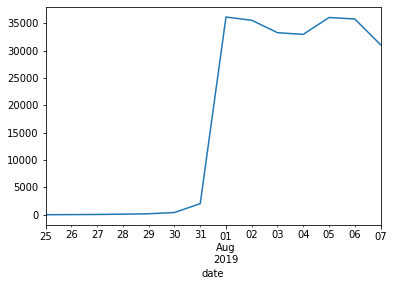

In [22]:
user_group_date.plot()

### Periode Yang Tercakup Data

In [23]:
print(df['date_time'].min())
print(df['date_time'].max())

2019-07-25 04:43:36
2019-08-07 21:15:17


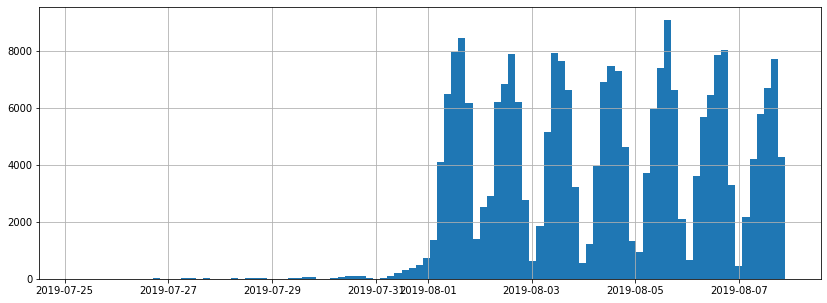

In [24]:
df['date_time'].hist(bins=100, figsize=(14, 5));

<AxesSubplot:xlabel='date'>

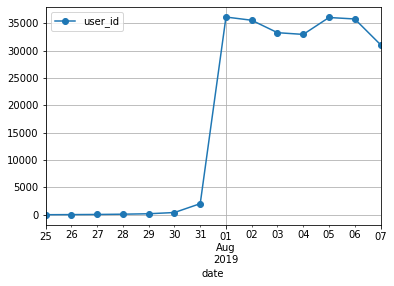

In [25]:
df.pivot_table(index='date', values='user_id', aggfunc='count').plot(style='o-', grid=True)

In [26]:
df_filtered = df.query('date_time > "2019-07-31 21:00"')

In [27]:
df_filtered.head()

,event,user_id,timestamp,exp_id,date_time,date
1989,MainScreenAppear,7701922487875823903,1564606857,247,2019-07-31 21:00:57,2019-07-31
1990,MainScreenAppear,2539077412200498909,1564606905,247,2019-07-31 21:01:45,2019-07-31
1991,OffersScreenAppear,3286987355161301427,1564606941,248,2019-07-31 21:02:21,2019-07-31
1992,OffersScreenAppear,3187166762535343300,1564606943,247,2019-07-31 21:02:23,2019-07-31
1993,MainScreenAppear,1118952406011435924,1564607005,248,2019-07-31 21:03:25,2019-07-31


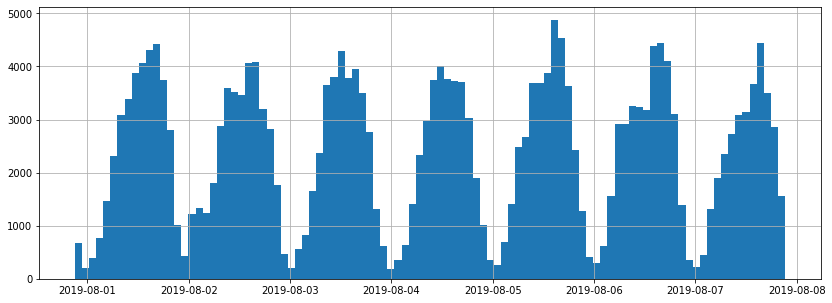

In [28]:
df_filtered['date_time'].hist(bins=100, figsize=(14, 5));

In [29]:
events_new = len(df_filtered)
users_new = len(df_filtered['user_id'].unique())
event_users_new = events_new / users_new
print(f'{events_new} events')
print(f'{users_new} users')
print(f'{event_users_new} event per user')

241724 events
7538 users
32.06739188113558 event per user


### Banyak Data Yang HIlang Saat Menyingkirkan Data Lama

In [30]:
((df.shape[0] - df_filtered.shape[0]) / len(df)) * 100

0.8161238834202524

### Jumlah Pengguna Pada Setiap Langkah

In [31]:
df['exp_id'].value_counts()

248    85582
246    80181
247    77950
Name: exp_id, dtype: int64

In [32]:
df_filtered['exp_id'].value_counts()

248    84875
246    79556
247    77293
Name: exp_id, dtype: int64

In [33]:
(df_filtered['exp_id'].value_counts()) / (df['exp_id'].value_counts())

248    0.991739
246    0.992205
247    0.991572
Name: exp_id, dtype: float64

Dari data yang sudah dibersihkan, dapat dilihat bahwa masing-masing kelompok memiliki sisa data diatas 99% yang mana berarti data tersebut masih sangat layak untuk digunakan. Setiap kelompok pun kehilangan data tidak sampai 1%.

## Corong Peristiwa

### Peristiwa Yang Ada Dalam Log dan Banyak Frekuensi Kemunculannya

In [34]:
df_filtered.pivot_table(index='event', values='user_id', aggfunc='count').sort_values('user_id', ascending = False)

,user_id
event,
MainScreenAppear,117889
OffersScreenAppear,46531
CartScreenAppear,42343
PaymentScreenSuccessful,33951
Tutorial,1010


### Jumlah Pengguna Yang Melakukan Setiap Tindakan

In [35]:
user_per_event = (
    df_filtered.pivot_table(
        index='event', 
        values='user_id',
        aggfunc='nunique').sort_values('user_id', ascending = False))

In [36]:
user_per_event

,user_id
event,
MainScreenAppear,7423
OffersScreenAppear,4597
CartScreenAppear,3736
PaymentScreenSuccessful,3540
Tutorial,843


In [37]:
user_per_event / df_filtered['user_id'].nunique()

,user_id
event,
MainScreenAppear,0.984744
OffersScreenAppear,0.609843
CartScreenAppear,0.495622
PaymentScreenSuccessful,0.469621
Tutorial,0.111833


### Urutan Peristiwa Yang Terjadi

Peristiwa yang terjadi dapat diurutkan sebagai berikut:
1. Pembeli masuk terlebih dahulu ke MainScreenAppear, tapi ada beberapa pembeli yang masuk terlebih dahulu ke dalam Tutorial.
2. Pembeli akan diarahkan ke halaman OffersScreenAppear yang mana lanjutan dari MainScreenAppear.
3. Selanjutnya diarahkan ke CartScreenAppear.
4. Terakhir adalah PaymentScreenSuccessful.

###  Persentase Pengguna Yang Terus Berlanjut Dari Satu Tahap Ke Tahap Berikutnya

In [38]:
user_per_event

,user_id
event,
MainScreenAppear,7423
OffersScreenAppear,4597
CartScreenAppear,3736
PaymentScreenSuccessful,3540
Tutorial,843


In [39]:
users_funnel = user_per_event[:-1]

In [40]:
users_funnel

,user_id
event,
MainScreenAppear,7423
OffersScreenAppear,4597
CartScreenAppear,3736
PaymentScreenSuccessful,3540


In [41]:
(users_funnel / users_funnel.shift()).fillna(1)

,user_id
event,
MainScreenAppear,1.000000
OffersScreenAppear,0.619291
CartScreenAppear,0.812704
PaymentScreenSuccessful,0.947537


### Tahap Paling Banyak Kehilangan Pengguna

Tahapan yang paling banyak kehilangan pengguna adalah pada tahapan MainScreenAppear ke OfferScreenAppear, yang mana jika dilihat dari pengolahan sebelumnya hanya sebesar 0.6 dari total pembeli awal yang melanjutkan proses.

### Persentase Pengguna Yang Berhasil Menyelesaikan Seluruh Tahapan Yang Ada

In [42]:
((user_per_event.loc['PaymentScreenSuccessful'] / user_per_event.loc['MainScreenAppear'])['user_id']) * 100

47.68961336386906

Sebanyak 47% pembeli berhasil menyelesaikan proses dari awal sampai akhir.

## Pelajari Hasil Eksperimen

### Pengguna Yang Ada Di Setiap Kelompok

In [43]:
user_per_group = df_filtered.pivot_table(index='exp_id',
                                         values='user_id',
                                         aggfunc='nunique')
user_per_group

,user_id
exp_id,
246,2484
247,2517
248,2537


### Melihat Perbedaan Antara Sampel 246 dan 247 Dari Sisi Statistik

In [44]:
user_event_per_group = df_filtered.pivot_table(index='event',
                                               values='user_id',
                                               columns='exp_id',
                                               aggfunc='nunique').sort_values(by=246, ascending=False)

In [45]:
user_event_per_group

exp_id,246,247,248
event,,,
MainScreenAppear,2450,2479,2494
OffersScreenAppear,1542,1524,1531
CartScreenAppear,1266,1239,1231
PaymentScreenSuccessful,1200,1158,1182
Tutorial,278,284,281


In [46]:
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):
    
    p1 = successes1/trials1
    
    p2 = successes2/trials2
    
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    
    difference = p1 - p2
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    
    distr = stats.norm(0, 1)
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print('Reject the null hypothesis: there is a significant difference between the shares')
    else:
        print('Failed to reject the null hypothesis, there is no reason to consider the shares different')

Selanjutnya melakukan uji hipotesis dengan H0 dan H1 sebagai berikut:
- H0 adalah kondisi dimana id 246 dan 247 SAMA
- H1 adalah kondisi dimana id 246 dan 247 TIDAK SAMA

In [47]:
check_hypothesis(user_event_per_group.loc['MainScreenAppear', 246],
                 user_event_per_group.loc['MainScreenAppear', 247],
                 user_per_group.loc[246],
                 user_per_group.loc[247])

p-value:  [0.67562177]
Failed to reject the null hypothesis, there is no reason to consider the shares different


In [48]:
def check_event_hypothesis(user_event_per_group, user_per_group,
                           event,
                           exp1, exp2
                          ):
    frac1 = user_event_per_group.loc[event, exp1] / user_per_group.loc[exp1]
    frac2 = user_event_per_group.loc[event, exp2] / user_per_group.loc[exp2]
    print(f'{frac1} event {event} group {exp1}')
    print(f'{frac2} event {event} group {exp2}')
    check_hypothesis(user_event_per_group.loc[event, exp1],
                     user_event_per_group.loc[event, exp2],
                     user_per_group.loc[exp1],
                     user_per_group.loc[exp2],
                    )

In [49]:
for event in user_event_per_group.index:
    check_event_hypothesis(user_event_per_group, user_per_group, event, 246, 247)
    print()

user_id    0.986312
Name: 246, dtype: float64 event MainScreenAppear group 246
user_id    0.984903
Name: 247, dtype: float64 event MainScreenAppear group 247
p-value:  [0.67562177]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.620773
Name: 246, dtype: float64 event OffersScreenAppear group 246
user_id    0.605483
Name: 247, dtype: float64 event OffersScreenAppear group 247
p-value:  [0.26698769]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.509662
Name: 246, dtype: float64 event CartScreenAppear group 246
user_id    0.492253
Name: 247, dtype: float64 event CartScreenAppear group 247
p-value:  [0.21828121]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.483092
Name: 246, dtype: float64 event PaymentScreenSuccessful group 246
user_id    0.460072
Name: 247, dtype: float64 event PaymentScreenSuccessful group 247
p-value:

### Membandingkan Satu Kelompok Dengan Kelompok Lainnya

Uji hipotesis dilakukan dengan kondisi sebagai berikut:
- H0 kondisi dimana id 246 dan 247 adalah SAMA
- H1 kondisi dimana id 246 dan 247 adalah TIDAK SAMA

In [50]:
for event in user_event_per_group.index:
    check_event_hypothesis(user_event_per_group, user_per_group, event, 246, 247)
    print()

user_id    0.986312
Name: 246, dtype: float64 event MainScreenAppear group 246
user_id    0.984903
Name: 247, dtype: float64 event MainScreenAppear group 247
p-value:  [0.67562177]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.620773
Name: 246, dtype: float64 event OffersScreenAppear group 246
user_id    0.605483
Name: 247, dtype: float64 event OffersScreenAppear group 247
p-value:  [0.26698769]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.509662
Name: 246, dtype: float64 event CartScreenAppear group 246
user_id    0.492253
Name: 247, dtype: float64 event CartScreenAppear group 247
p-value:  [0.21828121]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.483092
Name: 246, dtype: float64 event PaymentScreenSuccessful group 246
user_id    0.460072
Name: 247, dtype: float64 event PaymentScreenSuccessful group 247
p-value:

Uji hipotesis dilakukan untuk kondisi sebagai berikut:
- H0 jika id 246 dan 248 adalah SAMA
- H1 jika id 246 dan 248 adalah TIDAK SAMA

In [51]:
for event in user_event_per_group.index:
    check_event_hypothesis(user_event_per_group, user_per_group, event, 246, 248)
    print()

user_id    0.986312
Name: 246, dtype: float64 event MainScreenAppear group 246
user_id    0.983051
Name: 248, dtype: float64 event MainScreenAppear group 248
p-value:  [0.34705881]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.620773
Name: 246, dtype: float64 event OffersScreenAppear group 246
user_id    0.603469
Name: 248, dtype: float64 event OffersScreenAppear group 248
p-value:  [0.20836205]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.509662
Name: 246, dtype: float64 event CartScreenAppear group 246
user_id    0.485219
Name: 248, dtype: float64 event CartScreenAppear group 248
p-value:  [0.08328413]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.483092
Name: 246, dtype: float64 event PaymentScreenSuccessful group 246
user_id    0.465905
Name: 248, dtype: float64 event PaymentScreenSuccessful group 248
p-value:

Uji hipotesis dilakukan untuk kondisi sebagai berikut:
- H0 jika id 247 dan 248 adalah SAMA
- H1 jika id 247 dan 248 adalah TIDAK SAMA

In [52]:
for event in user_event_per_group.index:
    check_event_hypothesis(user_event_per_group, user_per_group, event, 247, 248)
    print()

user_id    0.984903
Name: 247, dtype: float64 event MainScreenAppear group 247
user_id    0.983051
Name: 248, dtype: float64 event MainScreenAppear group 248
p-value:  [0.60016616]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.605483
Name: 247, dtype: float64 event OffersScreenAppear group 247
user_id    0.603469
Name: 248, dtype: float64 event OffersScreenAppear group 248
p-value:  [0.88359567]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.492253
Name: 247, dtype: float64 event CartScreenAppear group 247
user_id    0.485219
Name: 248, dtype: float64 event CartScreenAppear group 248
p-value:  [0.61695175]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.460072
Name: 247, dtype: float64 event PaymentScreenSuccessful group 247
user_id    0.465905
Name: 248, dtype: float64 event PaymentScreenSuccessful group 248
p-value:

In [53]:
user_event_per_group_control = user_event_per_group.copy()
user_event_per_group_control.loc[:,247] += user_event_per_group_control.loc[:,246]
user_event_per_group_control.drop(columns=246, inplace=True)

In [54]:
user_event_per_group_control

exp_id,247,248
event,,
MainScreenAppear,4929,2494
OffersScreenAppear,3066,1531
CartScreenAppear,2505,1231
PaymentScreenSuccessful,2358,1182
Tutorial,562,281


In [55]:
user_per_group_control = user_per_group.copy()
user_per_group_control.loc[247] += user_per_group_control.loc[246]
user_per_group_control.drop(246, inplace=True)
user_per_group_control

,user_id
exp_id,
247,5001
248,2537


Uji hipotesis dilakukan untuk kondisi sebagai berikut:
- H0 jika id gabungan (246 dan 247) dan 248 adalah SAMA
- H1 jika id gabungan (246 dan 247) dan 248 adalah TIDAK SAMA

In [56]:
for event in user_event_per_group.index:
    check_event_hypothesis(user_event_per_group_control, user_per_group_control, event, 247, 248)
    print()

user_id    0.985603
Name: 247, dtype: float64 event MainScreenAppear group 247
user_id    0.983051
Name: 248, dtype: float64 event MainScreenAppear group 248
p-value:  [0.39298915]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.613077
Name: 247, dtype: float64 event OffersScreenAppear group 247
user_id    0.603469
Name: 248, dtype: float64 event OffersScreenAppear group 248
p-value:  [0.41899828]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.5009
Name: 247, dtype: float64 event CartScreenAppear group 247
user_id    0.485219
Name: 248, dtype: float64 event CartScreenAppear group 248
p-value:  [0.19819341]
Failed to reject the null hypothesis, there is no reason to consider the shares different

user_id    0.471506
Name: 247, dtype: float64 event PaymentScreenSuccessful group 247
user_id    0.465905
Name: 248, dtype: float64 event PaymentScreenSuccessful group 248
p-value:  

### Mengganti NIlai Alpha Untuk Melihat Signfikansi

Nilai alpha pada fungsi awal adalah 0.01 dan diganti dengan 0.5

In [61]:
def check_hypothesis_new(successes1, successes2, trials1, trials2, alpha=0.5):
    
    p1 = successes1/trials1
    
    p2 = successes2/trials2
    
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    
    difference = p1 - p2
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    
    distr = stats.norm(0, 1)
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print('Reject the null hypothesis: there is a significant difference between the shares')
    else:
        print('Failed to reject the null hypothesis, there is no reason to consider the shares different')

Uji hipotesis dilakukan untuk kondisi sebagai berikut:
- H0 jika id 246 dan 247 adalah SAMA
- H1 jika id 246 dan 247 adalah TIDAK SAMA

In [63]:
check_hypothesis_new(user_event_per_group.loc['MainScreenAppear', 246],
                 user_event_per_group.loc['MainScreenAppear', 247],
                 user_per_group.loc[246],
                 user_per_group.loc[247])

p-value:  [0.67562177]
Failed to reject the null hypothesis, there is no reason to consider the shares different


Uji hipotesis dilakukan untuk kondisi sebagai berikut:
- H0 jika id 246 dan 248 adalah SAMA
- H1 jika id 246 dan 248 adalah TIDAK SAMA

In [64]:
check_hypothesis_new(user_event_per_group.loc['MainScreenAppear', 246],
                 user_event_per_group.loc['MainScreenAppear', 248],
                 user_per_group.loc[246],
                 user_per_group.loc[248])

p-value:  [0.34705881]
Reject the null hypothesis: there is a significant difference between the shares


Uji hipotesis dilakukan untuk kondisi sebagai berikut:
- H0 jika id 247 dan 248 adalah SAMA
- H1 jika id 247 dan 248 adalah TIDAK SAMA

In [66]:
check_hypothesis_new(user_event_per_group.loc['MainScreenAppear', 247],
                 user_event_per_group.loc['MainScreenAppear', 248],
                 user_per_group.loc[247],
                 user_per_group.loc[248])

p-value:  [0.60016616]
Failed to reject the null hypothesis, there is no reason to consider the shares different


## Kesimpulan

Dari beberapa langkah pemrosesan data diatas, dapat diambil beberapa kesimpulan seperti:
- Terdapat beberapa data duplikat pada tabel, yang telah dihilangkan.
- Peningkatan jumlah pengguna meningkat pada tanggal 1 Agustus.
- Data yang diproses lebih lanjut adalah sebesar 99% dari total data awal.
- ID 246 dan 247 memiliki jumlah pengguna dan keduanya SAMA secara pengujian hipotesis.
- ID 246 dan 248 memiliki jumlah pengguna dan keduanya SAMA secara pengujian hipotesis.
- ID 247 dan 248 memiliki jumlah pengguna dan keduanya SAMA secara pengujian hipotesis.